**CODES ALONG WITH THE PLOTS** 

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
#to ignore unnecessary warnings



In [11]:
df=pd.read_excel("stud.xlsx")

In [131]:
df.describe() #a brief summary of the dataset

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**HISTOGRAM** 

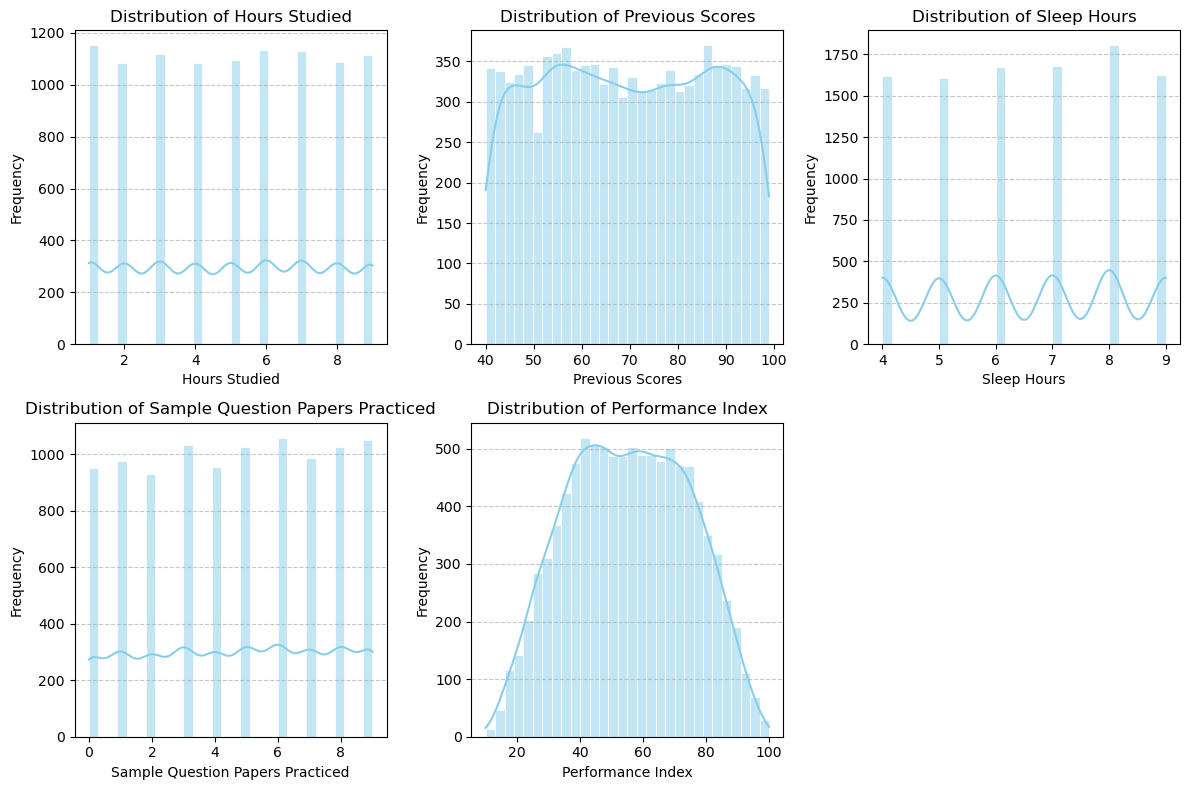

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))

# Looping through numeric columns and creating histograms with the kde line
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust grid size if more columns exist
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", edgecolor="white")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


->Final Key Takeaways From the above histograms:
1) Balanced study hours  6-8 hours of sleep = Best performance
2) Practicing more sample papers can boost scores
3) If sleep hours are too low, cognitive performance may drop
4) If performance index is low despite high study hours, focus on quality over quantity

**CORRELATION BARGRAPH**

Correlation of each factor with Performance Index:

Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Name: Performance Index, dtype: float64


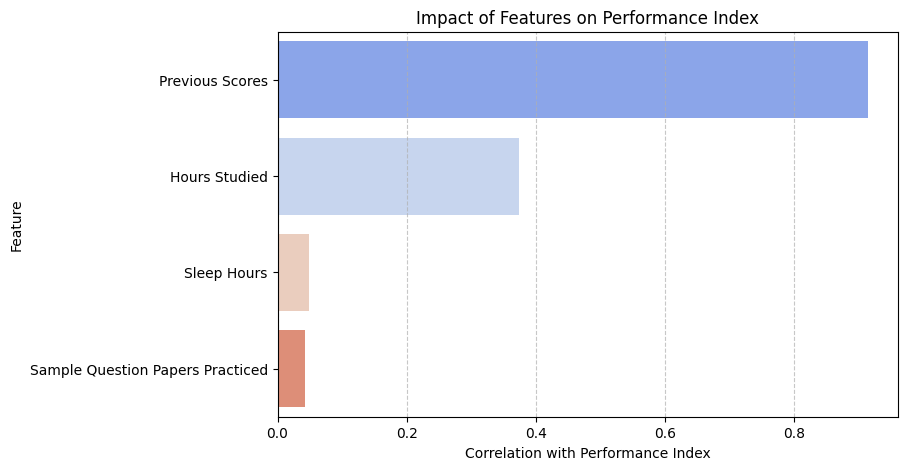

In [49]:
# Selected the numerical columns
numerical_columns = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]
correlation_values = df[numerical_columns].corr()["Performance Index"].drop("Performance Index")

# Sorting it is descending order to get the one with highest correlation
correlation_values = correlation_values.sort_values(ascending=False)
print("Correlation of each factor with Performance Index:\n")
print(correlation_values)

# Plotting the bar chart for visual representation
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_values.values, y=correlation_values.index, palette="coolwarm")
plt.xlabel("Correlation with Performance Index")
plt.ylabel("Feature")
plt.title("Impact of Features on Performance Index")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Feature  	    :  Correlation with Performance Index
Hours Studied	:  Strong Positive (High) 
Previous Scores :  Strong Positive (High) 
Sample Question
Papers Practiced :	Moderate Positive 
Sleep Hours      :  Weak Correlation (Almost None) 

**HEATMAP FOR THE CORRELATION**

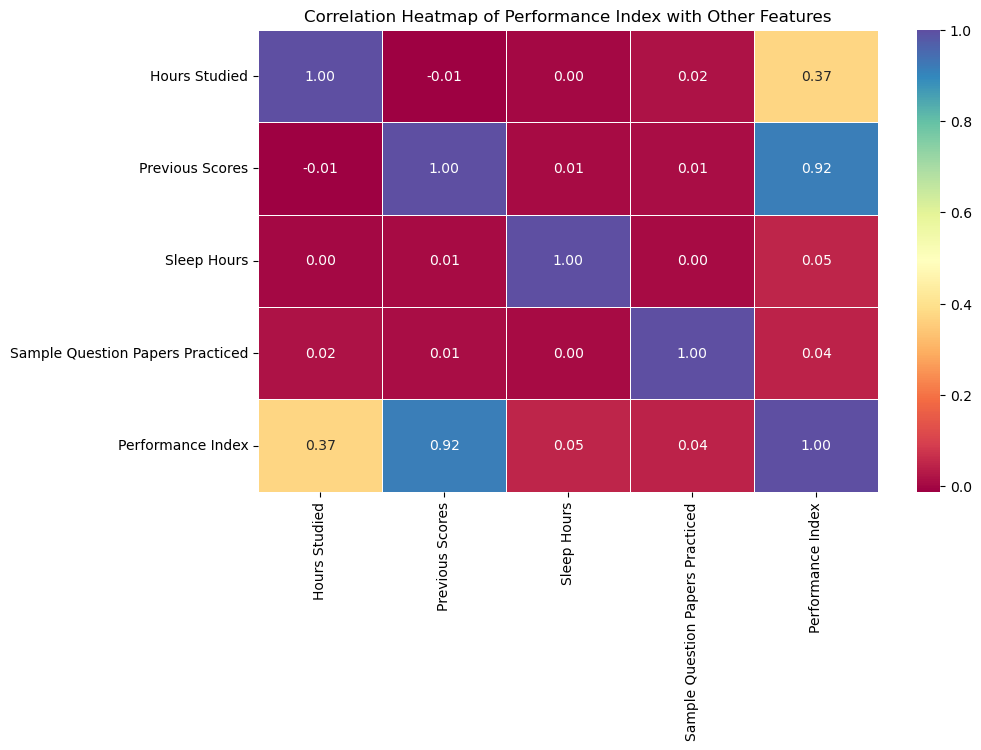

In [59]:


# Select numerical columns for correlation analysis
numerical_columns = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Performance Index with Other Features")
plt.show()


**SCATTERPLOT**

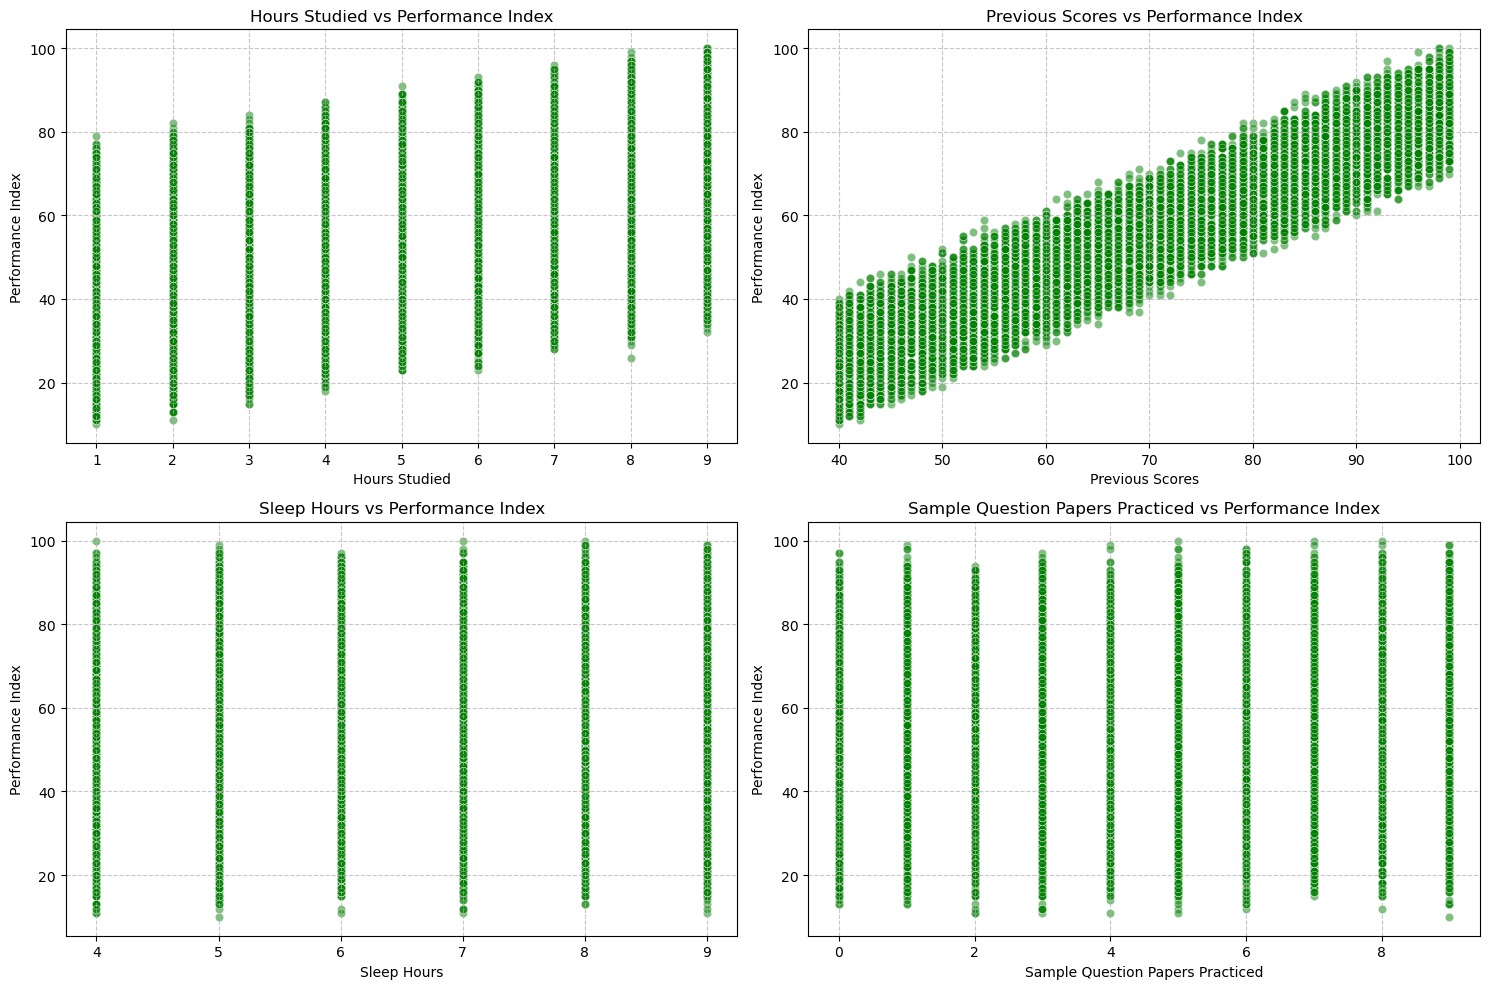

In [26]:

plt.figure(figsize=(15, 10))
features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
titles = ["Hours Studied vs Performance Index", "Previous Scores vs Performance Index",
          "Sleep Hours vs Performance Index", "Sample Question Papers Practiced vs Performance Index"]

#looping through the plots using subplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df["Performance Index"], alpha=0.5, color='green')
    plt.title(titles[i - 1])
    plt.xlabel(feature)
    plt.ylabel("Performance Index")
    plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

1)plot1 - shows that the range of marks is going up as the number of people study more like
there is about 40 mark difference in the lower limit of performance index

2)plot2 - shows almost a linear increase in the range of people who score high marks to the performance index
the performance index is fairly high amongst those who got a almost perfect previous score

3)plot3 - in every category of sleep hour , there a people who get more than 80 marks and people who get less than 40 as well
there is a fair share of varying performance index in each sleep hour

4)plot4 - follows a similar trend , one cannot tell anything about performance index even after having information on number of sample
papers practiced


**PIE CHART**

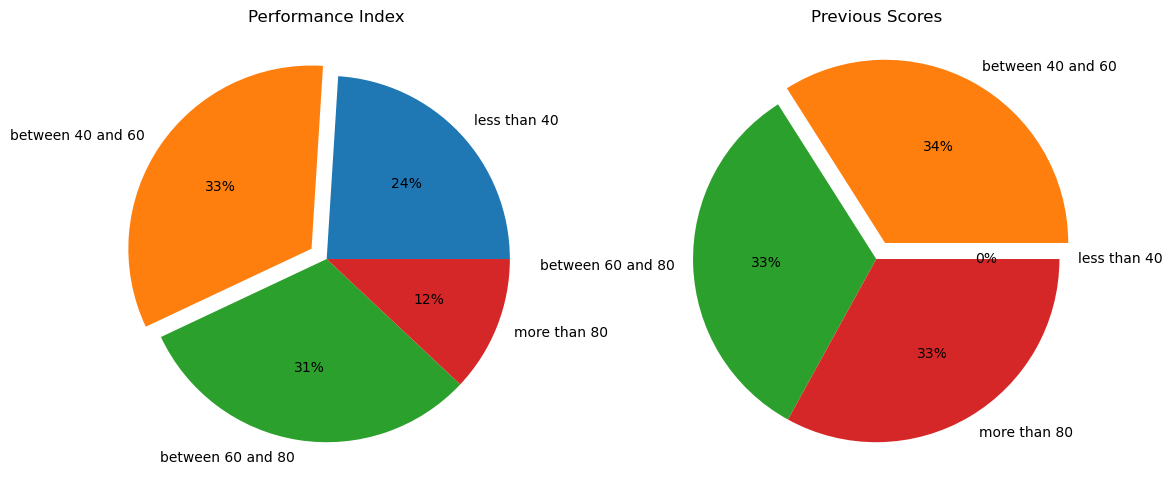

In [117]:
#Now we go for a piechart of Performance Index and Previous Scores
names_list = ["Performance Index","Previous Scores"]
lab = ["less than 40","between 40 and 60","between 60 and 80","more than 80"]
plt.figure(figsize = (13,10))

for k in range(0,2):
    count = 0
    count_list = [0,0,0,0]
    range_list = [0,40,60,80,100]

    #loop to calculate the counts for each range

    for i in range(0,4):
        for j in df[names_list[k]]:
            if(range_list[i]<=j<range_list[i+1]):
                count_list[i]+=1
    total = sum(count_list)
    count_list = [round(i/total*100) for i in count_list]
    plt.subplot(1,2,k+1)
    
    #we processed data required for the pieplot till now for performance index

    plt.pie(x = count_list,labels = lab,explode = [0,0.1,0,0],autopct='%.0f%%',)
    plt.title(label = names_list[k])
plt.show()

->**observation** - though the correlation is high but there is a significant difference
 between the percentage of people in each of the sections i.e there is almost no one under 40 maarks in this plot
 but around 25% people got less than 40 marks

**BOX PLOT** 

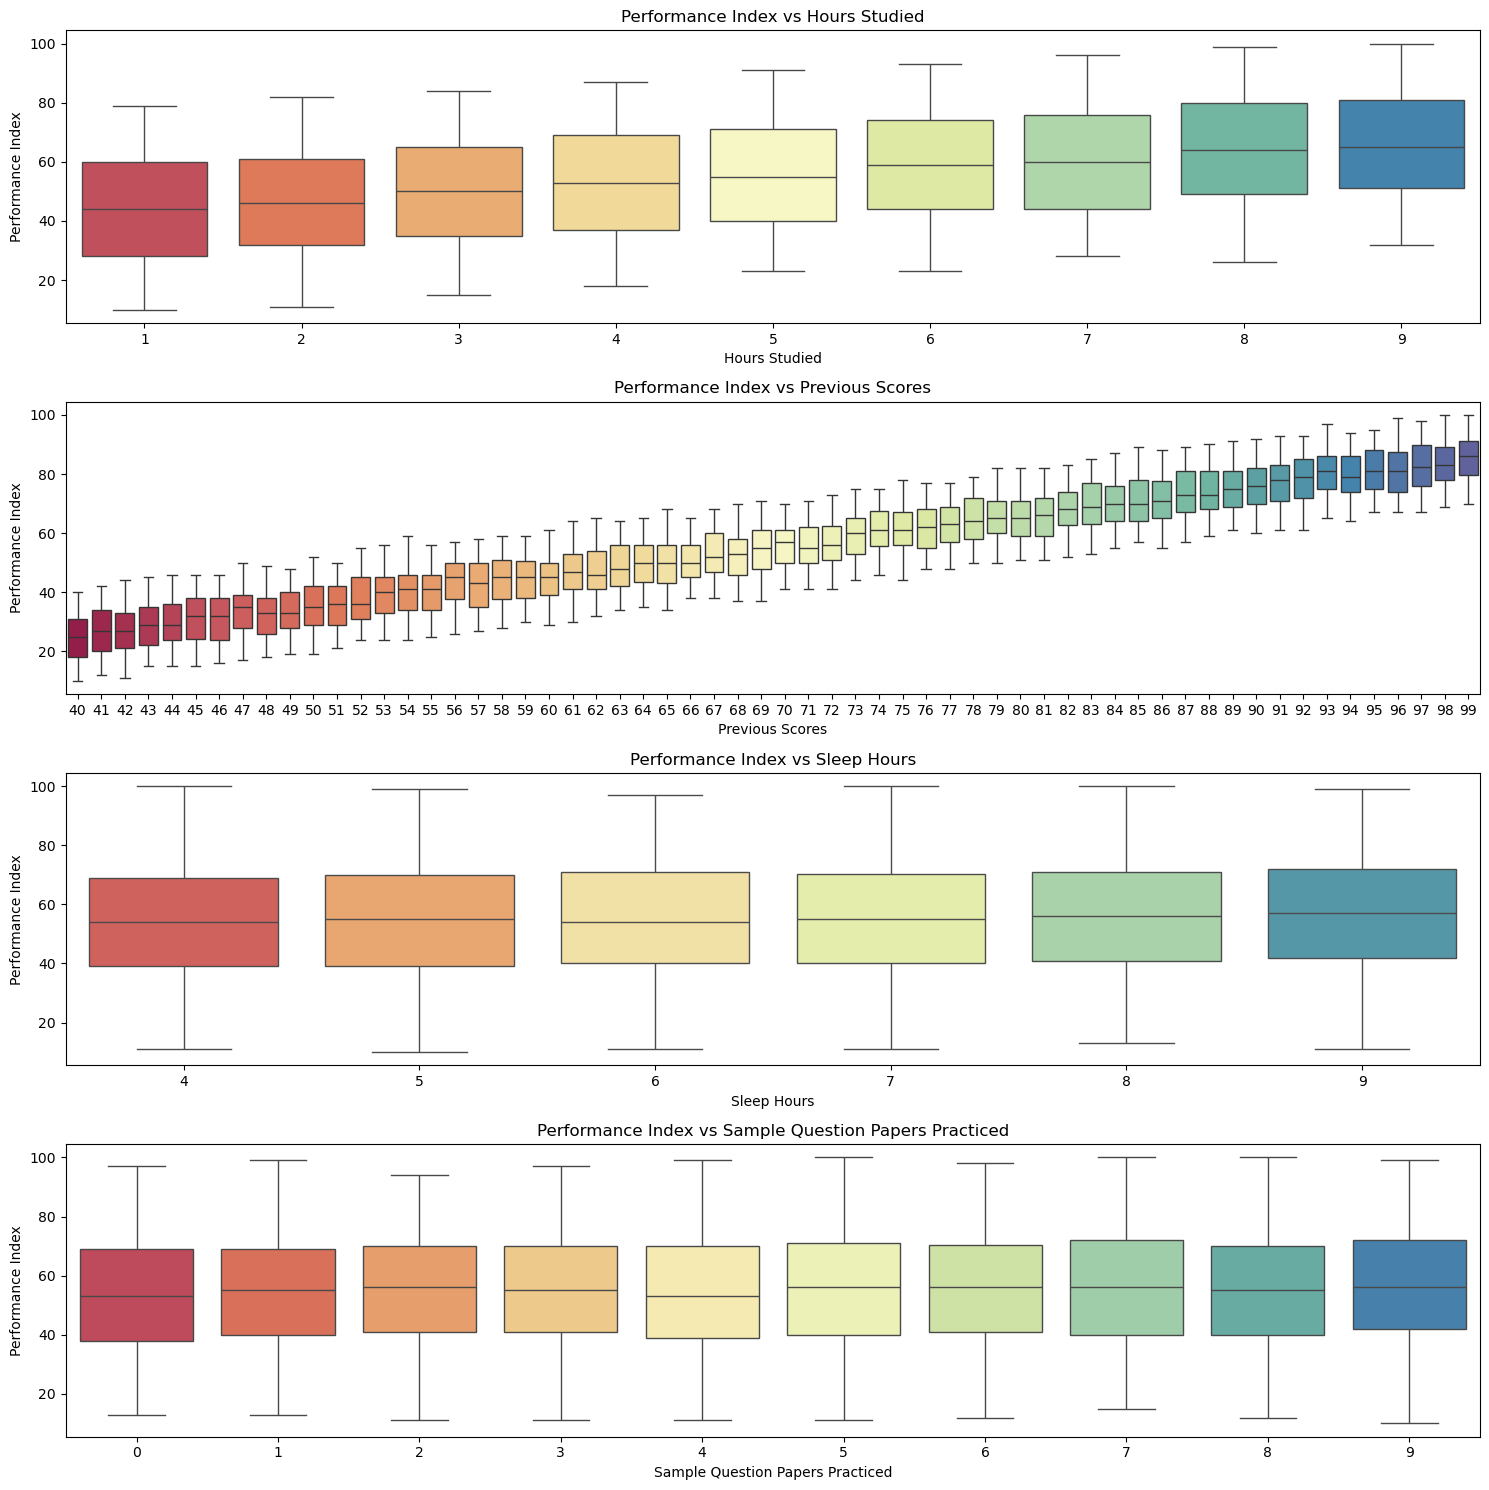

In [106]:
# Defining numerical features for comparison
numeric_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]

plt.figure(figsize=(15, 15))

# Creating box plots to anaylyze the relationship of each feature vs Performance Index
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 1, i)  # Arrange in a 4x1 grid
    sns.boxplot(x=df[feature], y=df["Performance Index"], palette="Spectral")
    plt.title(f"Performance Index vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Performance Index")

# Optimize layout
plt.tight_layout()
plt.show()


Observations:
1️) Hours Studied -
More study hours generally lead to higher scores.
Some outliers suggest that a few students study a lot but still score low.

2️) Previous Scores-
Strong correlation: Students with higher past scores tend to perform well.
A few students with low past scores performed exceptionally well!

3️) Sleep Hours -
No clear pattern, suggesting sleep hours have less impact on performance.
Some students sleep a lot and still score high.

4️) Sample Question Papers Practiced -
More practice papers seem to slightly help performance.
Some students who practiced a lot still have low scores, indicating other factors at play.


**LESS THAN OGIVE** 

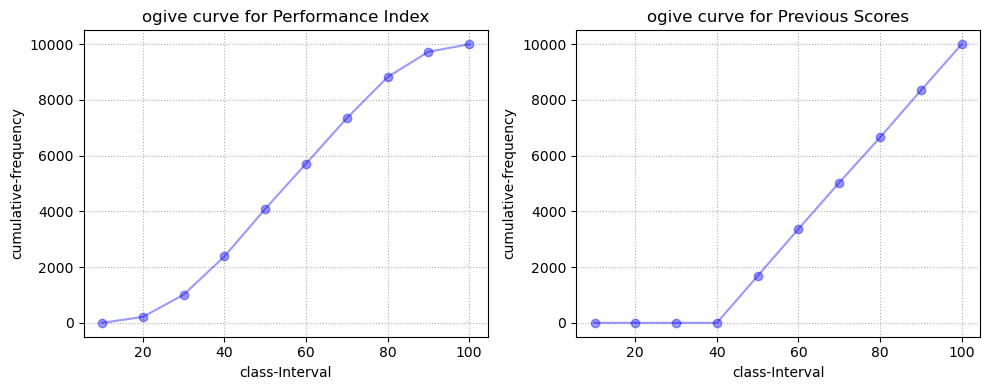

In [97]:
#class_interval,data_points for ogive

names_list = ["Performance Index","Previous Scores"]
plt.figure(figsize = (10,4))
for i in range(0,2):
    class_interval = list(range(0,110,10))
    main_data = df[names_list[i]]
    plt.subplot(1,2,i+1)
    #returns class intervals and frequency
    frequency,class_interval = np.histogram(main_data,class_interval)

    #returns cumulative frequency of the frequency list
    cumulative_frequency = np.cumsum(frequency)

    #we plot the ogive now
    plt.plot(class_interval[1:],cumulative_frequency,marker = 'o',color = 'blue',alpha = 0.4)
    plt.grid(True,linestyle = ":")
    plt.xlabel("class-Interval")
    plt.ylabel("cumulative-frequency")
    plt.title(f"ogive curve for {names_list[i]}")
plt.tight_layout()
plt.show()


Key Insights from the Ogive Graph 1:
1️) The curve rises steeply between 40-80, meaning most students have a Performance Index in this range.
2️) The cumulative frequency reaches near 100% at 100, indicating very few students have a perfect score.
3️) The lower range (0-40) has a slow increase, showing fewer students fall into the "Low Performance" category.

-> For the second graph 
1)The curve starts flat with little to no increase in frequency up to around the 40 mark. 
2)After this point, there is a steep upward trend, indicating that most of the scores fall in the higher ranges. 
3)The conclusion is that a significant portion of the data is concentrated in the upper class intervals, leading to a rapid rise in cumulative frequency.

**CENTRAL LIMIT APPROXIMATION**

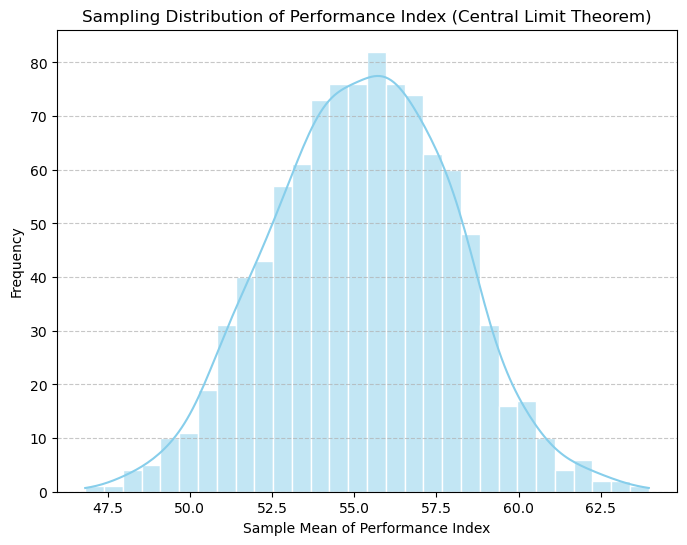

Mean of Population: 55.22
Mean of Sample Means: 55.26
Standard Deviation of Population: 19.21
Standard Deviation of Sample Means: 2.73


In [41]:
sample_size = 50   # Each sample will have 50 students
num_samples = 1000  # Number of samples to take

sample_means = []

for _ in range(num_samples):
    sample = df["Performance Index"].sample(n=sample_size, replace=True)  # Random sampling with replacement
    sample_means.append(sample.mean())

# Plotting the sampling distribution of sample means
plt.figure(figsize=(8, 6))
sns.histplot(sample_means, bins=30, kde=True, color="skyblue", edgecolor="white")
plt.title("Sampling Distribution of Performance Index (Central Limit Theorem)")
plt.xlabel("Sample Mean of Performance Index")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(f"Mean of Population: {df['Performance Index'].mean():.2f}")
print(f"Mean of Sample Means: {np.mean(sample_means):.2f}")
print(f"Standard Deviation of Population: {df['Performance Index'].std():.2f}")
print(f"Standard Deviation of Sample Means: {np.std(sample_means, ddof=1):.2f}")  # Standard error approximation


-> Key Insights from CLT Application
1) Normal Shape → The sampling distribution is approximately normal, even if the original data is not.
2) Sample Mean ≈ Population Mean → The average of all sample means is close to the true population mean.
3) Standard Deviation Decreases → The standard deviation of sample means (standard error) is smaller than the population standard deviation.
4) Larger Samples Improve Accuracy → Increasing the sample size (e.g., from 50 to 100) makes the distribution even tighter and more normal.